In [ ]:
import pandas as pd
import numpy as np

# loading dataset and cleaning
df = pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/diabetes_.csv")
df.head()
# Check datatype
df.info()
# Missing values
df.isnull().sum()
# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Handling missing values

df.isnull().sum() #output shows no missing values
#droping any rows with missing values
df_drop = df.dropna()
df_drop


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
import pandas as pd
import numpy as np

# Separate the feature matrix (X) and target variable (y)
X = df.drop(columns = ['Outcome']).values
Y = df['Outcome'].values

# Perform Train–Test Split from Scratch (70% – 30%)

# setting a random seed
np.random.seed(42)

# Shuffle indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# Split indices in 70% - 30% ratio
split_ratio = 0.7
split_index = int(len(X) * split_ratio)

train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Creating train and test set
X_train = X[train_indices]
X_test  = X[test_indices]

Y_train = Y[train_indices]
Y_test  = Y[test_indices]

# Verify the split
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))



Total samples: 768
Training samples: 537
Testing samples: 231


In [ ]:
# Implementin KNN form scratch

import numpy as np

def euclidean_distance(a, b):
  return np.sqrt(np.sum((a-b)**2))

def predict_single(X_train, Y_train, query, k=3):
    """
    Predict the class of a single query sample using KNN.

    X_train: Training features (NumPy array)
    y_train: Training labels (NumPy array)
    query: Single sample to predict
    k: Number of neighbors
    """
    # Compute distances to all training points
    distances = np.array([euclidean_distance(query, x) for x in X_train])

    # Get indices of k nearest neighbors
    k_indices = distances.argsort()[:k]

    # Get the labels of k nearest neighbors
    k_nearest_labels = Y_train[k_indices]

    # Majority vote
    counts = np.bincount(k_nearest_labels)
    return counts.argmax()

# Predict classes for all test samples
def predict_all(X_train, Y_train, X_test, k=3):
  predictions = [predict_single(X_train, Y_train, x, k) for x in X_test]
  return np.array(predictions)

# Evaluate Accuracy
def accuracy_score(Y_true, Y_pred):
  return np.mean(Y_true == Y_pred)

# Example use
# assuming we already have X_train, X_test, Y_train, Y_test

k = 5 #overrides the defult value in function

Y_pred = predict_all(X_train, Y_train, X_test, k)

acc = accuracy_score(Y_test, Y_pred)
print(f"KNN Accuracy: {acc*100:.2f}%")



KNN Accuracy: 71.43%


In [ ]:
import numpy as np

# Compute mean and std from training data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Avoid division by zero
std[std == 0] = 1

# Scale train and test
X_train_scaled = (X_train - mean) / std
X_test_scaled  = (X_test - mean) / std

# Define k
k = 3

# Predict using correct query variable
Y_pred_scaled = [
    predict_single(X_train_scaled, Y_train, x, k)
    for x in X_test_scaled
]

# Accuracy calculation
accuracy_scaled = np.mean(Y_pred_scaled == Y_test)
print(f"Accuracy with scaled data:, {accuracy_scaled*100}%")


Accuracy with scaled data:, 69.6969696969697%


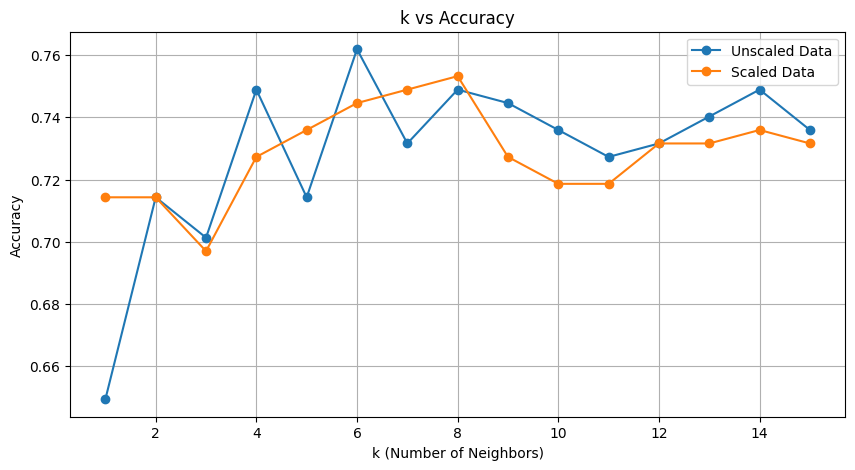

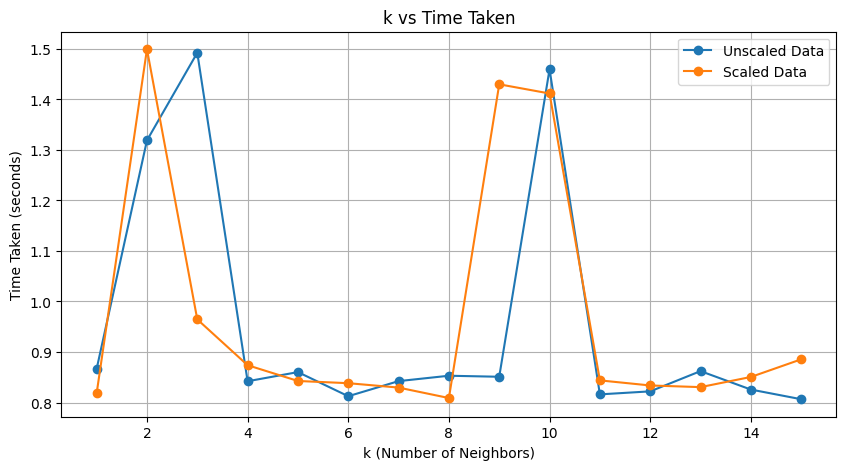

In [ ]:
# Problem 3
# Measuring accuracy and time

import numpy as np
import time
import matplotlib.pyplot as plt

# Range of k values
k_values = range(1,16)

# Lists to store results
accuracy_unscaled = []
accuracy_scaled = []
time_unscaled = []
time_scaled =[]

for k in k_values:
  #unscaled dataset
  start = time.time()
  preds_unscaled = [predict_single(X_train, Y_train, x, k)for x in X_test]
  end = time.time()

  accuracy_unscaled.append(np.mean(preds_unscaled == Y_test))
  time_unscaled.append(end - start)

  # --- Scaled dataset ---
  start = time.time()
  preds_scaled = [predict_single(X_train_scaled, Y_train, x, k) for x in X_test_scaled]
  end = time.time()

  accuracy_scaled.append(np.mean(preds_scaled == Y_test))
  time_scaled.append(end - start)

# Accuracy vs k

plt.figure(figsize=(10,5))
plt.plot(k_values, accuracy_unscaled, label='Unscaled Data', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Data', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# time vs k

plt.figure(figsize=(10,5))
plt.plot(k_values, time_unscaled, label='Unscaled Data', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Data', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)
plt.show()

#The experiment shows that KNN accuracy is highly dependent on the choice of k. Small k values are sensitive to noise, while very large k values may underfit the data. Scaling the features improves performance across all k values. Computational cost increases slightly with k, but the main cost is distance computation. Based on the results, an intermediate k (e.g., 3–5) provides the best trade-off between accuracy and stability.

